In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [ ]:
cd gdrive/My\ Drive/Pull-0-Depth

/content/gdrive/My Drive/Pull-0-Depth


In [ ]:
!ls

bg	bg_713	bg_test		    Depto_Dataset.zip  fg_713	  fg_new
bg_192	bg_714	Depto_Dataset2.zip  fg_711	       fg_bg.jpg  mask.jpg


In [ ]:
import numpy as np

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
counth = 0
countw = 0

bg_images_path = r'bg_713'
fg_images_path = r'mask_fg_w30'
maskfg_images_path = r'fg_w30'
for i, filename in enumerate(os.listdir(bg_images_path)):
  bg_path = os.path.join(bg_images_path, filename)
  im = Image.open(bg_path, 'r')
  w, h = im.size
  left, upper = ((w-h)/2)+5,5
  right, lower =  (w-(w-h)/2)-5,h-5
  im = im.crop((left, upper, right, lower))
  im = im.resize((192,192))
  im.save(f'bg_192/bg192_{i:02d}.jpg', quality= 100)

#   print(im.size)
#   w,h = im.size
  
#   if h<w:
#     counth += 1
#   else:
#     countw +=1
#     b = im.size

# print(counth, countw)
# print(b)

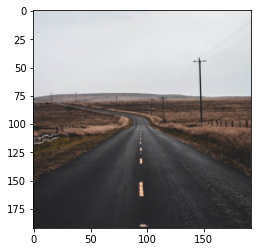

In [ ]:
im = Image.open(r'bg_192/bg192_99.jpg')
plt.imshow(np.asarray(im))

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from google.colab.patches import cv2_imshow
from tqdm.auto import tqdm

np.random.seed(42)
bg_images_path = r'bg_192'
fg_images_path = r'fg_713'

for i, bg_name in tqdm(enumerate(os.listdir(bg_images_path))):
  bg_path = os.path.join(bg_images_path, bg_name)
  bg_img = Image.open(bg_path)
  bg_h, bg_w = bg_img.size
  count = 0
  for j, fg_name in tqdm(enumerate(os.listdir(fg_images_path))):
    fg_path = os.path.join(fg_images_path, fg_name)
    img = cv2.imread(fg_path, -1)
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)

    for k in range(1,2):
      for flip in [1]:
        
        if flip:
          ret,thresh = cv2.threshold(img[:,:,3],0,255,cv2.THRESH_BINARY)
        else:
          img = cv2.flip(img, 1)
          ret,thresh = cv2.threshold(img[:,:,3],0,255,cv2.THRESH_BINARY)
        
        h,w = img.shape[:2]
        if h>w:
          new_h = int(np.random.randint(bg_h/2, bg_w/1.5))
          new_img = cv2.resize(img, (int((new_h*w)/h), new_h), cv2.INTER_CUBIC)
          new_mask = cv2.resize(thresh, (int((new_h*w)/h), new_h), cv2.INTER_CUBIC)
        else:
          new_w = int(np.random.randint(bg_h/2, bg_w/1.5))
          new_img = cv2.resize(img, (new_w, int((new_w*h)/w)), cv2.INTER_CUBIC)
          new_mask = cv2.resize(thresh, (new_w, int((new_w*h)/w)), cv2.INTER_CUBIC)

        fg_h, fg_w = new_img.shape[:2]
        pos_h = np.random.randint(fg_h,bg_h)-fg_h
        pos_w = np.random.randint(fg_w,bg_w)-fg_w

        temp_bg = bg_img.copy()
        temp_bg.paste(Image.fromarray(new_img), (pos_w,pos_h), mask = Image.fromarray(new_img))
        temp_bg.save(f'bg_fg_test/a{bg_name[:-4]}_fg{count:04d}.jpg', optimizer= True, quality= 80)


        mask = Image.new('1', (192,192))
        mask.paste(Image.fromarray(new_mask), (pos_w,pos_h), mask = Image.fromarray(new_mask))
        mask.save(f'bg_fg_test/b{bg_name[:-4]}_fg{count:04d}.jpg', optimizer= True, quality= 25)

        count += 1

    if j == 2:
      break

In [ ]:
im = Image.open('cycle.jpg', 'r')
w, h = im.size
left, upper = ((w-h)/2)+5,5
right, lower =  (w-(w-h)/2)-5,h-5
im = im.crop((left, upper, right, lower))
im = im.resize((192,192))
im.save(f'bg_192/bg192_{i:02d}.jpg', quality= 100)

In [ ]:
bg_img = Image.open('back.jpg')
bg_h, bg_w = bg_img.size 
count = 0
for i in range(1,6):
  img = cv2.imread(f'{i}.png', -1)
  img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)

  for flip in [1,0]:
        
        if flip:
          ret,thresh = cv2.threshold(img[:,:,3],0,255,cv2.THRESH_BINARY)
        else:
          img = cv2.flip(img, 1)
          ret,thresh = cv2.threshold(img[:,:,3],0,255,cv2.THRESH_BINARY)
        
        h,w = img.shape[:2]
        if h>w:
          new_h = int(np.random.randint(bg_h/2, bg_w/1.5))
          new_img = cv2.resize(img, (int((new_h*w)/h), new_h), cv2.INTER_CUBIC)
          new_mask = cv2.resize(thresh, (int((new_h*w)/h), new_h), cv2.INTER_CUBIC)
        else:
          new_w = int(np.random.randint(bg_h/2, bg_w/1.5))
          new_img = cv2.resize(img, (new_w, int((new_w*h)/w)), cv2.INTER_CUBIC)
          new_mask = cv2.resize(thresh, (new_w, int((new_w*h)/w)), cv2.INTER_CUBIC)

        fg_h, fg_w = new_img.shape[:2]
        pos_h = np.random.randint(fg_h,bg_h)-fg_h
        pos_w = np.random.randint(fg_w,bg_w)-fg_w

        temp_bg = bg_img.copy()
        temp_bg.paste(Image.fromarray(new_img), (pos_w,pos_h), mask = Image.fromarray(new_img))
        temp_bg.save(f'bg_test/{count}.jpg', optimizer= True, quality= 80)
        count += 1

In [ ]:
from PIL import Image
img = Image.open('mask.jpg')
print(img.mode)
t = np.array(img)
t.shape

L


(192, 192)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from zipfile import ZipFile
from tqdm.auto import tqdm

np.random.seed(42)
bg_images_path = r'bg_192'
fg_images_path = r'fg_713'
count = 0

with ZipFile('Depto_Dataset2.zip', 'a') as depth_zip:
  for i, bg_name in tqdm(enumerate(os.listdir(bg_images_path))):
    bg_path = os.path.join(bg_images_path, bg_name)
    bg_img = Image.open(bg_path)
    bg_h, bg_w = bg_img.size
    count = 0
    for j, fg_name in tqdm(enumerate(os.listdir(fg_images_path))):
      fg_path = os.path.join(fg_images_path, fg_name)
      img = cv2.imread(fg_path, -1)
      img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
      for k in range(1,21):
        for flip in [1, 0]:
          
          if flip: #Take Original
            ret,thresh = cv2.threshold(img[:,:,3],0,255,cv2.THRESH_BINARY)
          else: #Flip the Image
            img = cv2.flip(img, 1)
            ret,thresh = cv2.threshold(img[:,:,3],0,255,cv2.THRESH_BINARY)
          
          h,w = img.shape[:2]
          if h>w:
            new_h = int(np.random.randint(bg_h/2, bg_w/1.5))
            new_img = cv2.resize(img, (int((new_h*w)/h), new_h), cv2.INTER_CUBIC)
            new_mask = cv2.resize(thresh, (int((new_h*w)/h), new_h), cv2.INTER_CUBIC)
          else:
            new_w = int(np.random.randint(bg_h/2, bg_w/1.5))
            new_img = cv2.resize(img, (new_w, int((new_w*h)/w)), cv2.INTER_CUBIC)
            new_mask = cv2.resize(thresh, (new_w, int((new_w*h)/w)), cv2.INTER_CUBIC)

          fg_h, fg_w = new_img.shape[:2]
          pos_h = np.random.randint(fg_h,bg_h) - fg_h 
          pos_w = np.random.randint(fg_w,bg_w) - fg_w

          temp_bg = bg_img.copy()
          temp_bg.paste(Image.fromarray(new_img), (pos_w,pos_h), mask = Image.fromarray(new_img))
          temp_bg.save('fg_bg.jpg', optimizer= True, quality= 80)
          depth_zip.write('fg_bg.jpg', f'Dataset/fg_bg/{bg_name[:-4]}_fg{count:04d}.jpg')

          mask = Image.new('1', (192,192))
          mask.paste(Image.fromarray(new_mask), (pos_w,pos_h), mask = Image.fromarray(new_mask))
          mask.save('mask.jpg', optimizer= True, quality= 20)
          depth_zip.write('mask.jpg', f'Dataset/mask/{bg_name[:-4]}_fg{count:04d}.jpg')

          count += 1